# Importing libraries

In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading the dataset

In [50]:
df = pd.read_csv(r'C:\Users\KARANDE SIR\OneDrive\Desktop\New folder (2)\iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Basic information 

In [51]:
# displaying the statistics of data
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
#number of samples on each class
df['variety'].value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

In [53]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.shape

(150, 5)

# Missing Value's Imputation

In [55]:
# check for null values
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

# Data Visualisation

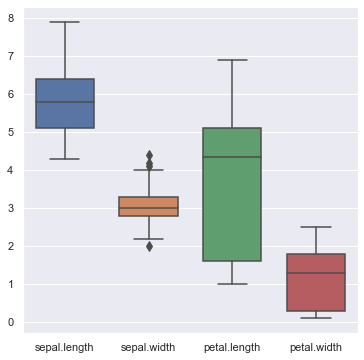

In [56]:
#boxplot
sns.boxplot(data = df, width= 0.7, fliersize = 7)
sns.set(rc = {"figure.figsize" :(6,6)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014814133AC8>,
      dtype=object)

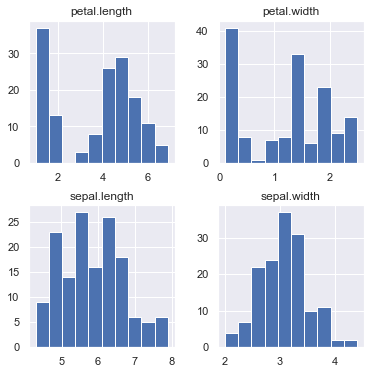

In [57]:
#histograms
df.hist()

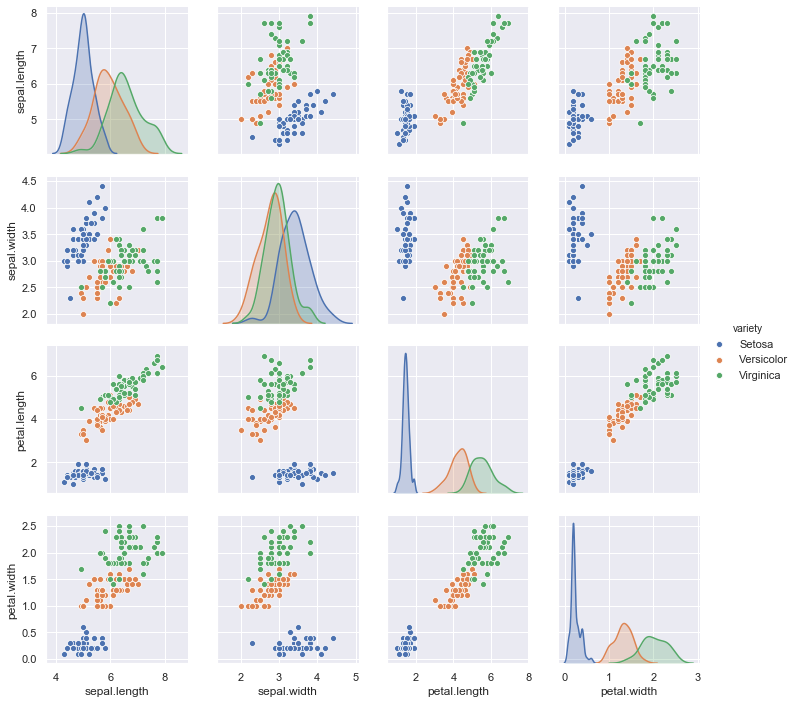

In [58]:
sns.pairplot(df, hue="variety")

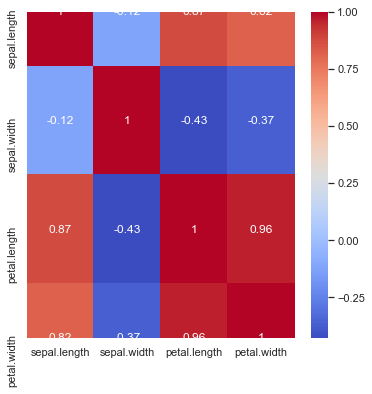

In [61]:
#heatmap (to determine the correlation between column values)
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Correlation

In [62]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


# Label encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [64]:
df['variety'] = LE.fit_transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Building

In [65]:
#Splitting our dataset to train and test the model
from sklearn.model_selection import train_test_split
X = df.drop(columns=['variety'])
Y = df['variety']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [66]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [67]:
#training SVC model on our training set
model = []
model.append(('SVC', SVC(gamma='auto')))

In [68]:
#predicting on x_test
model = SVC(gamma='auto')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

# Checking the Accuracy

In [69]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Conclusion


The accuracy of our model on the test set is 0.97, which means that the model will make the right prediction 97% of the time. So, we can conclude that our model is reliable for the irises prediction.

#                                                 THANK YOU!